# Pump it Up: Data Mining the Water Table

By: [Ville Heilala](https://heila.la), 2017

Datasource: http://taarifa.org/, http://maji.go.tz/, https://www.drivendata.org

Goal is to predict the operating condition of a waterpoint for each record in the dataset.

## Model the data: optimize metaparameters

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [3]:
######################
# Read data
##################################################################

train_values = pd.read_csv("/train_values_processed.csv")
test_values = pd.read_csv("/test_values_processed.csv")

In [4]:
exclude = ("id", "test", "train", "status_group", "num_private", "scheme_name",
           'waterpoint_type_group',
           'quality_group',
           'payment_type',
           'extraction_type_group',
           'extraction_type_class',
           'management_group',
           'source_type',
           'source_class')

In [6]:
%%capture --no-stdout
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict

######################
# Select features
##################################################################

# Select all features except which start with a string in exclude
features = [col for col in list(train_values) if not col.startswith(exclude)]

######################
# Train model
##################################################################

max_features = [0.20, 0.50, 0.80, "sqrt", "log2", None]

error_score = OrderedDict((label, []) for label in max_features)

min_estimators = 10
max_estimators = 100

# Evaluate classifier with different hyperparameters
for mf in max_features:
    
    # Build a forest of trees from the training set
    clf = RandomForestClassifier(n_estimators=min_estimators, 
                                 min_samples_leaf=2, 
                                 max_features=mf, 
                                 oob_score=True, 
                                 n_jobs=-1, 
                                 random_state=20, 
                                 warm_start=True)

    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(train_values[features], train_values["status_group"])
        oob_error = 1 - clf.oob_score_
        error_score[mf].append((i, oob_error))
        print(str(mf) + ": " + str(i) + ", " + str(oob_error))

0.2: 10, 0.212441077441
0.2: 11, 0.209545454545
0.2: 12, 0.208737373737
0.2: 13, 0.206245791246
0.2: 14, 0.204343434343
0.2: 15, 0.20303030303
0.2: 16, 0.201161616162
0.2: 17, 0.199444444444
0.2: 18, 0.197996632997
0.2: 19, 0.197171717172
0.2: 20, 0.196986531987
0.2: 21, 0.196144781145
0.2: 22, 0.195185185185
0.2: 23, 0.194831649832
0.2: 24, 0.193720538721
0.2: 25, 0.193282828283
0.2: 26, 0.193131313131
0.2: 27, 0.192575757576
0.2: 28, 0.192373737374
0.2: 29, 0.192558922559
0.2: 30, 0.192575757576
0.2: 31, 0.191936026936
0.2: 32, 0.191447811448
0.2: 33, 0.191447811448
0.2: 34, 0.191262626263
0.2: 35, 0.190740740741
0.2: 36, 0.190353535354
0.2: 37, 0.189915824916
0.2: 38, 0.189764309764
0.2: 39, 0.189494949495
0.2: 40, 0.189663299663
0.2: 41, 0.18936026936
0.2: 42, 0.189242424242
0.2: 43, 0.18898989899
0.2: 44, 0.188754208754
0.2: 45, 0.188249158249
0.2: 46, 0.18803030303
0.2: 47, 0.188484848485
0.2: 48, 0.188468013468
0.2: 49, 0.187996632997
0.2: 50, 0.187828282828
0.2: 51, 0.187777777

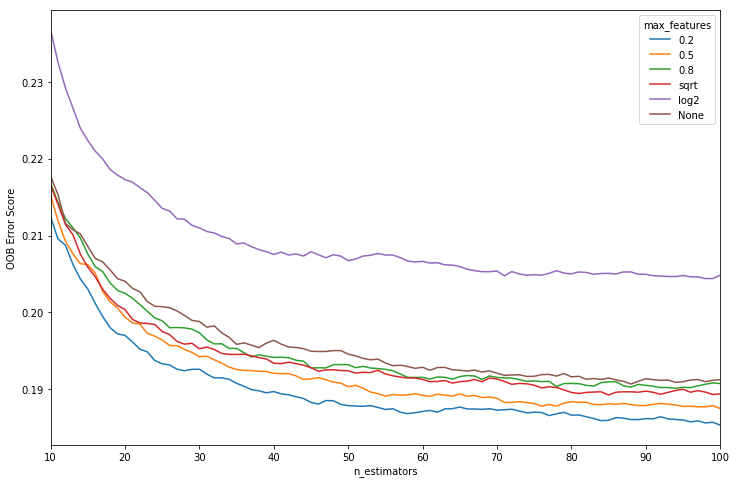

In [7]:
######################
# Plot results
##################################################################        

plt.figure(figsize=(12,8))

# Plot OOB Error Score vs. n_estimators
for mf, clf_err in error_score.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=str(mf))

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB Error Score")
plt.legend(title="max_features", loc="upper right")
plt.show();